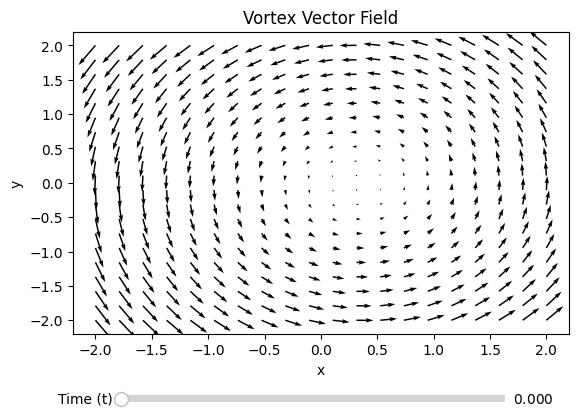

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider
from math import sin, cos

%matplotlib inline

# Provided beads2d class
class beads2d(object):
    def __init__(self):
        pass

    def sample(self, x, y, t):
        u = -2 * y + (2 * sin(t)) / 3
        v = +2 * x - (2 * cos(t)) / 3
        return u, v

# Create an instance of the vector field
field = beads2d()

# Grid definition
x = np.linspace(-2, 2, 20)
y = np.linspace(-2, 2, 20)
X, Y = np.meshgrid(x, y)

# Initial time
t0 = 0.0

# Sample vector field at t0
U, V = field.sample(X, Y, t0)

# Set up the figure and axis
fig, ax = plt.subplots()
plt.subplots_adjust(bottom=0.25)  # Leave space for the slider

# Quiver plot
quiver = ax.quiver(X, Y, U, V)
ax.set_title("Vortex Vector Field")
ax.set_xlabel("x")
ax.set_ylabel("y")

# Slider axis: [left, bottom, width, height]
slider_ax = plt.axes([0.2, 0.1, 0.6, 0.03])
time_slider = Slider(slider_ax, 'Time (t)', 0.0, 2 * np.pi, valinit=t0)

# Update function for slider
def update(val):
    t = time_slider.val
    U, V = field.sample(X, Y, t)
    quiver.set_UVC(U, V)
    fig.canvas.draw_idle()

# Connect slider to update function
time_slider.on_changed(update)

# Show the plot
plt.show()